In [28]:
import networkx as nx
from statsmodels.distributions.empirical_distribution import ECDF
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
import seaborn as sns

In [2]:
def draw_network_colored(g, p, centrality):
    plt.figure(figsize=(13, 7))
    nx.draw_networkx(g,
                     pos=p,

                     font_size=12,
                     font_weight='bold',
                     font_color='plum',
                     edge_color='grey'
                     )

    nodes = nx.draw_networkx_nodes(g, p, cmap=plt.get_cmap('Blues'), node_color=[c for c in centrality.values()],
                                   node_size=600,
                                   )
    nodes.set_edgecolor('lightgrey')
    plt.axis('off')
    plt.show()

In [3]:
g = nx.Graph()
g.add_edges_from([(1, 2),
                  (1, 3),
                  #(1,4),
                  (1, 5),
                  (1, 6),
                  (2, 5),
                  (5, 4),
                  (3, 5),

                  (3, 4),
                  (3, 7),
                  (2, 6),
                  (4, 7),
                  (5, 6),
                  (5, 7),
                  (6, 7),
                  (6, 8),
                  #(6,11),(6,12),
                  (7, 8),
                  (8, 9), (10, 9), (10, 11), (10, 12), (10, 13), (10, 14), (10, 15)
                  ])




Graph with 15 nodes and 23 edges


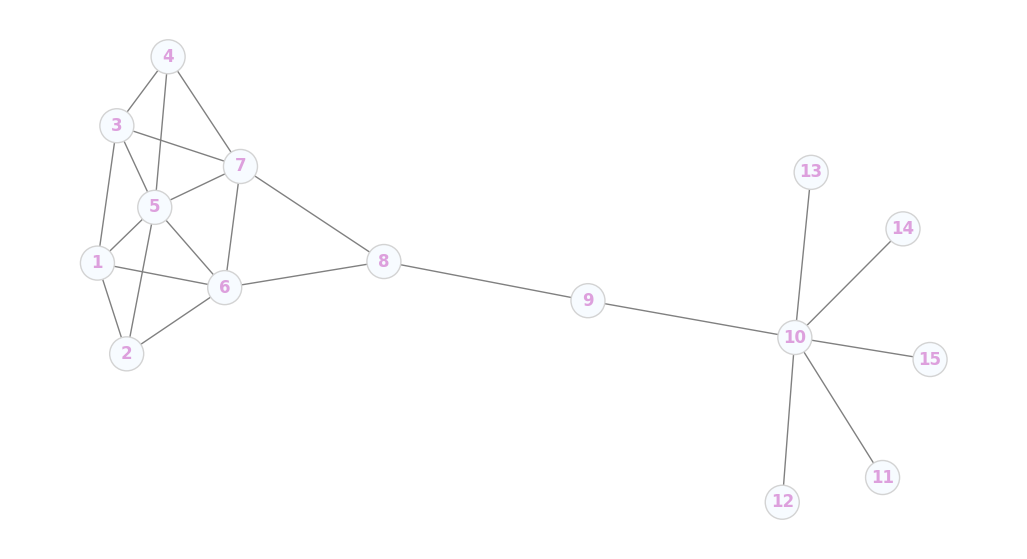

In [5]:
print(g)
posizione = nx.spring_layout(g)

draw_network_colored(g, posizione, {i: 0 for i in g.nodes()})

In [16]:
# Degree Centrality

degree_centrality = nx.degree_centrality(g)  # Already normalized
node_d_centr = list(degree_centrality.items())
node_d_centr.sort(key=lambda x: x[1], reverse=True)
node_d_centr[:5]

[(5, 0.42857142857142855),
 (10, 0.42857142857142855),
 (6, 0.3571428571428571),
 (7, 0.3571428571428571),
 (1, 0.2857142857142857)]

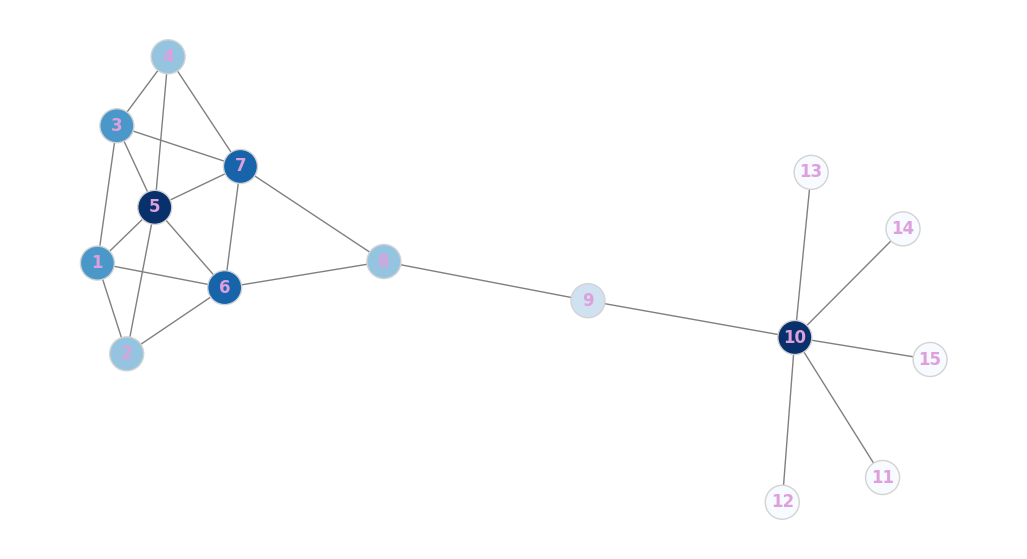

In [17]:
draw_network_colored(g, posizione, degree_centrality)  #Color intensity is based on centrality values

In [18]:
# Closeness Centrality

closeness_centrality = nx.closeness_centrality(g)
node_c_centr = list(closeness_centrality.items())
node_c_centr.sort(key=lambda x: x[1], reverse=True)
node_c_centr[:5]  # Top nodes based on Closeness Centrality

[(8, 0.4666666666666667),
 (9, 0.45161290322580644),
 (6, 0.4117647058823529),
 (7, 0.4117647058823529),
 (10, 0.4117647058823529)]

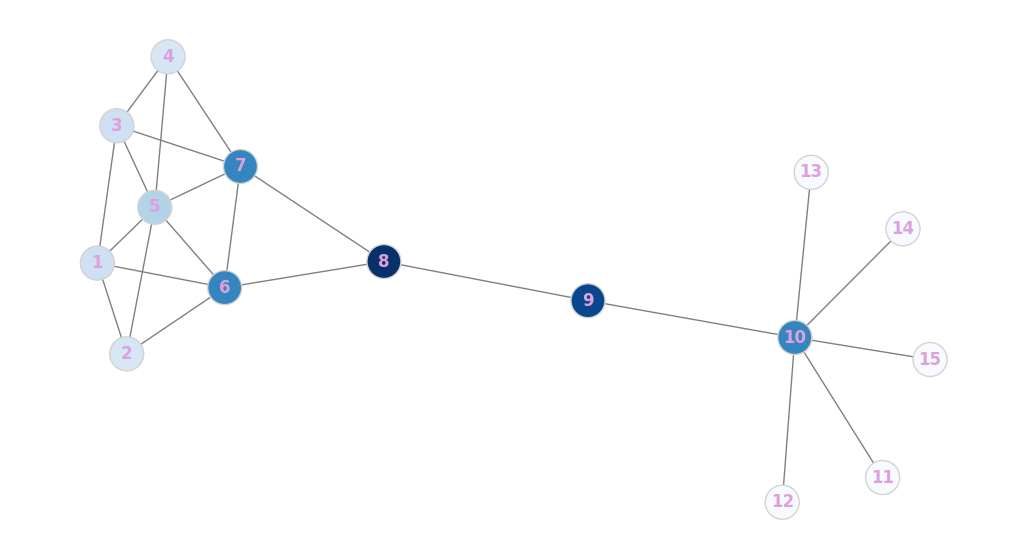

In [20]:
draw_network_colored(g, posizione, closeness_centrality)

# I nodi 6,7 e 10 sono i nodi che soffrono del fenomeno "Big in Japan" (sono famosi, ma solo dalla loro parte del grafo)

In [21]:
# Betweenness Centrality

betweenness_centrality = nx.betweenness_centrality(g)
node_b_centr = list(betweenness_centrality.items())
node_b_centr.sort(key=lambda x: x[1], reverse=True)
node_b_centr[:5]

[(10, 0.6043956043956045),
 (8, 0.5384615384615385),
 (9, 0.5274725274725275),
 (6, 0.22893772893772898),
 (7, 0.22893772893772898)]

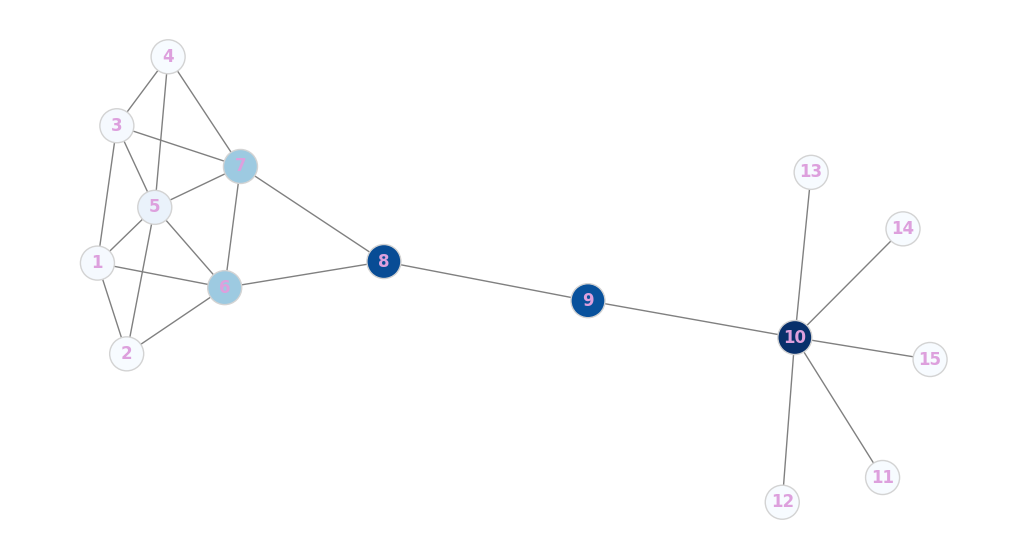

In [22]:
draw_network_colored(g, posizione, betweenness_centrality)

# Se volessi davvero individuare quali nodi colpire per rompere una rete, dovrei tenere conto di quali collegamenti è facile ricostruire (e in più potrei non conoscere tutti i collegamenti)

In [23]:
# Eigenvector Centrality

eigenvector_centrality = nx.eigenvector_centrality(g, 200)
node_e_centr = list(eigenvector_centrality.items())
node_e_centr.sort(key=lambda x: x[1], reverse=True)
node_e_centr[:5]

[(5, 0.4809055537794832),
 (7, 0.39765137400982187),
 (6, 0.3976513740098218),
 (1, 0.3521196600707744),
 (3, 0.35211966007077433)]

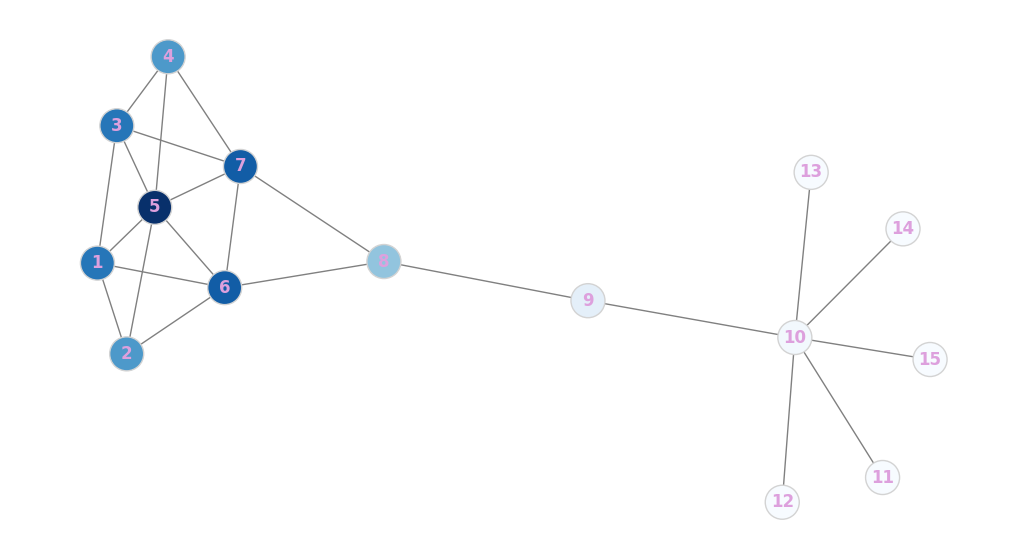

In [24]:
draw_network_colored(g, posizione, eigenvector_centrality)

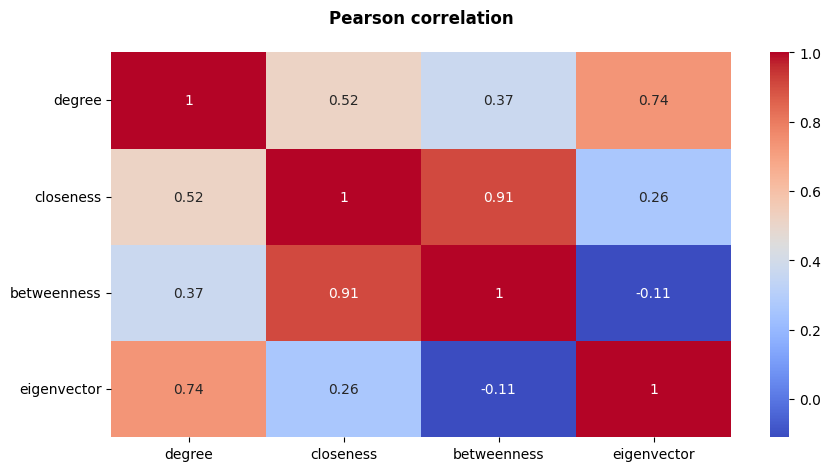

In [29]:
# Centrality Measure Comparisons using Pearson Correlation

all_centr = [degree_centrality, closeness_centrality, betweenness_centrality, eigenvector_centrality]
corrs = [[scipy.stats.pearsonr(list(c1.values()), list(c2.values()))[0] for c1 in all_centr] for c2 in all_centr]
centralities = ['degree', 'closeness', 'betweenness', 'eigenvector']
plt.figure(figsize=(10, 5))
sns.heatmap(pd.DataFrame(corrs), annot=True, cmap='coolwarm')
plt.xticks([x + 0.5 for x in range(4)], centralities, rotation=0)
plt.yticks([x + 0.5 for x in range(4)], centralities, rotation=0)
plt.title('Pearson correlation\n', weight='bold')
plt.show()


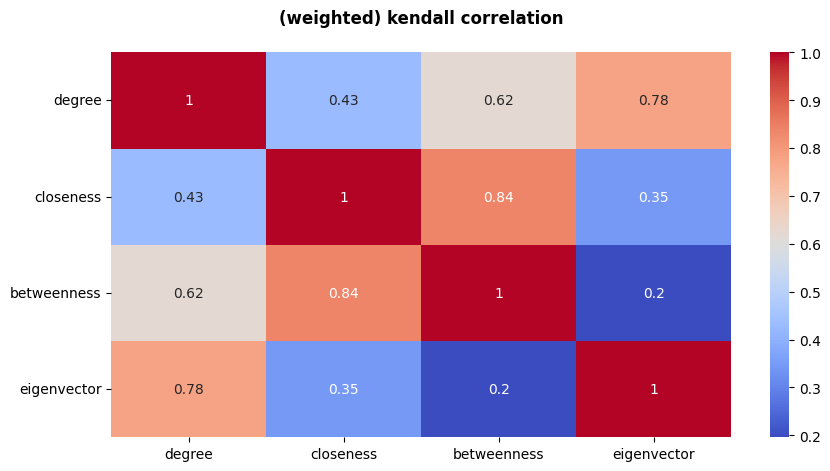

In [30]:
# For better understanding we compare the ranks, instead of the values -> We use kendall correlation between lists

all_centr = [degree_centrality, closeness_centrality, betweenness_centrality, eigenvector_centrality]
ranks = [[scipy.stats.weightedtau(list(c1.values()), list(c2.values()))[0] for c1 in all_centr] for c2 in all_centr]
centralities = ['degree', 'closeness', 'betweenness', 'eigenvector']
plt.figure(figsize=(10, 5))
sns.heatmap(pd.DataFrame(ranks), annot=True, cmap='coolwarm')
plt.xticks([x + 0.5 for x in range(4)], centralities, rotation=0)
plt.yticks([x + 0.5 for x in range(4)], centralities, rotation=0)
plt.title('(weighted) kendall correlation\n', weight='bold')
plt.show()

In [ ]:
# Alcuni confronti sono molto banali (hanno un motivo matematico).

# Più interessante è osservare come una certa lista di nodi presumibilmente importanti correli con le varie definizioni di centralità


### Esercizio

- Scaricare i dati da http://konect.cc/networks/dimacs10-polblogs/
- Costruire un grafo diretto
- Calcolare tutti i tipi di centralità
- Rispondere alle domande:
    - Qual è il massimo valore di betweenness centrality? Arrotondato a 4 cifre decimali
    - C'è un nodo che è il primo hub in più centralità? Se sì quale?
    - E' più alta la correlazione rank-aware tra closeness e betweenness o tra degree e eigenvector?
    - Quanti e quali sono i nodi in comune nella top 10 di degree e eigenvector centrality?

In [36]:
edge_list = [
    (r.split()[0], r.split()[1])
    for r in open("../data/political_blogs/out.dimacs10-polblogs")
]

G = nx.from_edgelist(
    edgelist=edge_list,
    create_using=nx.DiGraph(),
)

G.size(), G.order()

(33430, 1224)

In [44]:
degree_centrality = nx.degree_centrality(G)
sorted_by_degree_centrality = sorted(
    degree_centrality.items(),
    key=lambda x: x[1],
    reverse=True
)

closeness_centrality = nx.closeness_centrality(G)
sorted_by_closeness_centrality = sorted(
    closeness_centrality.items(),
    key=lambda x: x[1],
    reverse=True
)

betweenness_centrality = nx.betweenness_centrality(G)
sorted_by_betweenness_centrality = sorted(
    betweenness_centrality.items(),
    key=lambda x: x[1],
    reverse=True
)

eigenvector_centrality = nx.eigenvector_centrality(G)
sorted_by_eigenvector_centrality = sorted(
    eigenvector_centrality.items(),
    key=lambda x: x[1],
    reverse=True
)

In [48]:
print("Max Betweenness Centrality is %.4f" % sorted_by_betweenness_centrality[0][1])

Max Betweenness Centrality is 0.0977


In [50]:
max_deg = sorted_by_degree_centrality[0][0]
max_clo = sorted_by_closeness_centrality[0][0]
max_bet = sorted_by_betweenness_centrality[0][0]
max_eig = sorted_by_eigenvector_centrality[0][0]

max_deg, max_clo, max_bet, max_eig # Node 9 is the highest in both Degree and Eigenvector

('9', '163', '460', '9')

In [59]:
coeff1 = scipy.stats.weightedtau(
    list(closeness_centrality.values()),
    list(betweenness_centrality.values())
)[0]

coeff2 = scipy.stats.weightedtau(
    list(degree_centrality.values()),
    list(eigenvector_centrality.values())
)[0]

coeff1, coeff2 #Degree-Eigenvector is higher

(np.float64(0.8525008302245709), np.float64(0.9033480401469915))

In [56]:
top_10_deg = set(n for n, _ in sorted_by_degree_centrality[:10])
top_10_eig = set(n for n, _ in sorted_by_eigenvector_centrality[:10])

top_10_deg.intersection(top_10_eig)

{'136', '163', '21', '5', '9'}